In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import random
import gzip


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int8)
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
x_train = np.array(x_train).reshape(x_train.shape[0], 28, 28, 1)
x_test =np.array(x_test).reshape(x_test.shape[0], 28, 28, 1)



In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Index:  25492
Actual value : 2


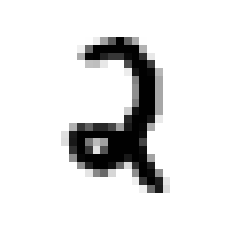

In [4]:
index = random.randint(0,60000)
sd=X.iloc[index]
dd=np.asarray(sd).reshape(28,28)
print('Index: ', index)
print('Actual value :', y[index])
plt.imshow(dd,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
print('Training the Model')

classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(np.array(X).reshape(X.shape[0], 28*28), y)

Training the Model


In [6]:
y_pred = classifier.predict(x_test.reshape(x_test.shape[0], 28*28))

In [7]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))

[[ 976    1    1    0    0    1    0    1    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   7    4 1007    1    0    0    1   11    1    0]
 [   0    0    1  995    0    6    0    6    0    2]
 [   0    4    0    0  964    0    2    1    0   11]
 [   4    0    0    7    2  874    2    1    0    2]
 [   4    3    0    0    3    1  947    0    0    0]
 [   0   13    1    0    1    0    0 1004    0    9]
 [   5    1    4   10    4    9    2    3  933    3]
 [   2    4    2    5    6    3    1    6    0  980]]
Accuracy:  0.9814


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       998
           1       1.00      0.97      0.99      1164
           2       0.98      0.99      0.98      1017
           3       0.99      0.98      0.98      1018
           4       0.98      0.98      0.98       980
           5       0.98      0.98      0.98       894
           6       0.99      0.99      0.99       955
           7       0.98      0.97      0.97      1033
           8       0.96      1.00      0.98       934
           9       0.97      0.97      0.97      1007

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [9]:
# import pickle

# pickle.dump(classifier,open('model.pkl','wb'))

In [10]:
import joblib

joblib.dump(classifier, 'knn_model.gzip', compress=('gzip',3))

['knn_model.gzip']